#### End to End Machine Learning Project

*This is an example project from the book but with a different dataset*

For this project we will be using the [bank analysis](https://latex.codecogs.com/png.latex?%5Cinline%20x%20%3D%200)

##### 1 Frame the problem

1. Ask how the model is being used, mention what the model's output will look like.

---
#### pipelines

> A sequence of data processing components is called a data *pipeline*.

> Components typically run aysnchronously. Each component pulls in a large amount of data, processes it, and spits out the result in another data store. Then, some time later, the next component in the pipeline pulls this data and spits out its own output.

If a component breaks down we can use the last output of the component, and broken component would go unnoticed if not properly monitored

---

2. Next step would be ask if there any current solutions to solve the problem (if there is any) and find how the current solution find the answer for the problem.

##### 2 Designing the System

3. Find whether the current machine learning problem is supervised, unsupervised or reinforcement learning, Find whether the it is a classification task, a regression task. Find whether you will need to use batch learning or online learning techniques


Current problem is **supervised task** and a **regression problem**. The dataset has labeled training examples mentioning whether its users are buying the product are they not. 

4. Select a performance measure. A typical performance measure for regression problem is Root Mean Square Error (RMSE).This is also known as the cost function.


![RMSE](https://latex.codecogs.com/png.latex?%5Cinline%20%5Ctextup%7BRMSE%7D%28%5Cmathbf%7BX%7D%2Ch%29%20%3D%20%5Csqrt%7B%5Cfrac%7B1%7D%7Bm%7D%20%5Csum_%7Bi%20%3D%201%7D%5E%7Bm%7D%28h%28%5Cmathbf%7Bx%7D%5E%7B%28i%29%7D-y%5E%7B%28i%29%7D%29%29%5E%7B2%7D%7D)

[more information](https://github.com/kana800/selfstudy/blob/main/_course/course_1/Model%20and%20Cost%20Function.ipynb)

#### Loading the Data

In [1]:
import pandas as pd

df = pd.read_csv('train.csv')

In [2]:
# quick look at the Data Structure
df.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,25,blue-collar,single,high.school,no,yes,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
1,40,admin.,married,high.school,no,no,no,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.958,5228.1,no
2,51,technician,married,university.degree,no,yes,no,cellular,aug,wed,...,5,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32950 non-null  int64  
 1   job             32950 non-null  object 
 2   marital         32950 non-null  object 
 3   education       32950 non-null  object 
 4   default         32950 non-null  object 
 5   housing         32950 non-null  object 
 6   loan            32950 non-null  object 
 7   contact         32950 non-null  object 
 8   month           32950 non-null  object 
 9   day_of_week     32950 non-null  object 
 10  duration        32950 non-null  int64  
 11  campaign        32950 non-null  int64  
 12  pdays           32950 non-null  int64  
 13  previous        32950 non-null  int64  
 14  poutcome        32950 non-null  object 
 15  emp.var.rate    32950 non-null  float64
 16  cons.price.idx  32950 non-null  float64
 17  cons.conf.idx   32950 non-null 

In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.048983,259.105372,2.567648,962.414021,0.173080,0.079347,93.573330,-40.497939,3.618948,5166.964003
std,10.447702,260.561125,2.778174,187.064504,0.497709,1.571305,0.579098,4.636680,1.734956,72.220794
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,320.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


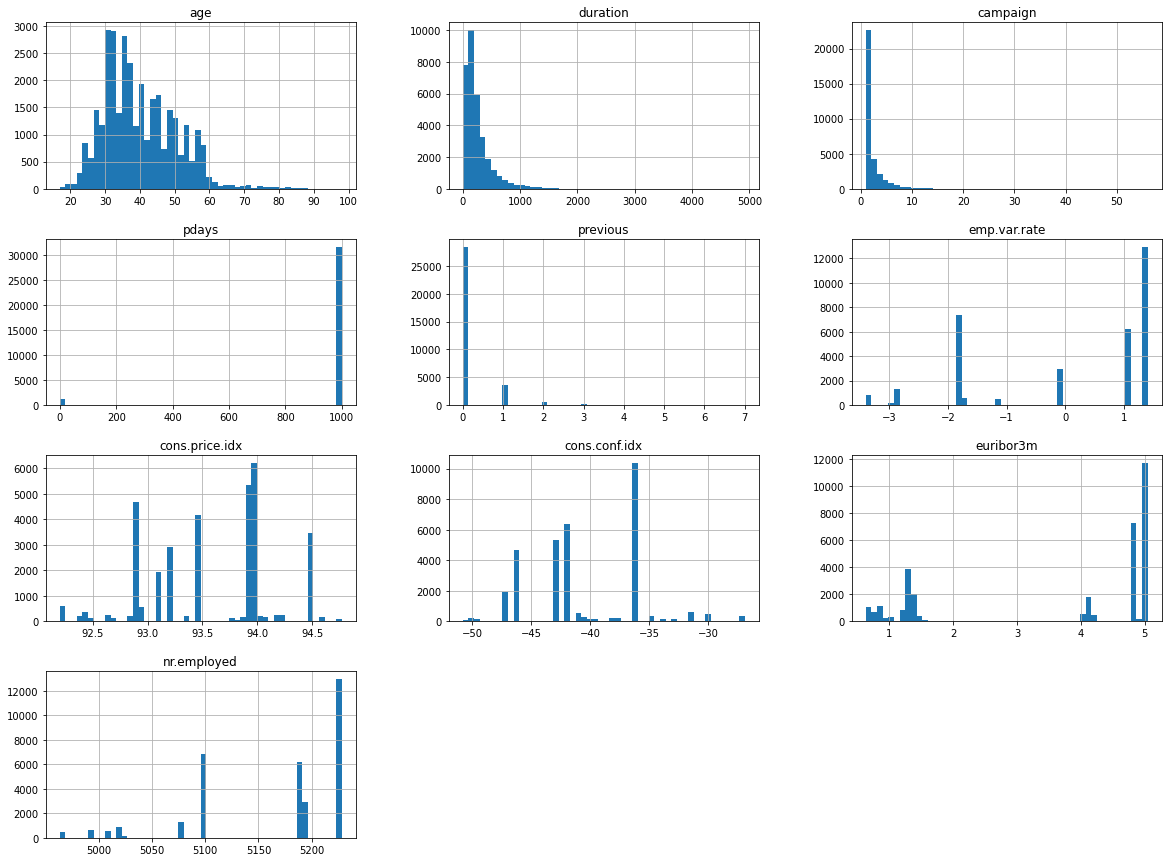

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [6]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [7]:
train_set, test_set = split_train_test(df,0.2)
print("Length of Train test", len(train_set))
print("Length of Test test", len(test_set))

Length of Train test 26360
Length of Test test 6590


In [8]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df,test_size = 0.2)

#### Finding the correlations

In [9]:
corr_matrix = df.corr()

In [10]:
corr_matrix

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000534,0.003871,-0.040499,0.026070,-0.002521,-0.000826,0.131373,0.009118,-0.019976
duration,-0.000534,1.000000,-0.069824,-0.048276,0.020718,-0.028314,0.003376,-0.013826,-0.032236,-0.042909
campaign,0.003871,-0.069824,1.000000,0.053601,-0.078849,0.150863,0.126796,-0.012469,0.135417,0.144133
pdays,-0.040499,-0.048276,0.053601,1.000000,-0.591424,0.269786,0.076003,-0.090215,0.297244,0.374741
previous,0.026070,0.020718,-0.078849,-0.591424,1.000000,-0.418414,-0.201620,-0.045885,-0.452213,-0.500041
emp.var.rate,-0.002521,-0.028314,0.150863,0.269786,-0.418414,1.000000,0.776241,0.195424,0.972280,0.907165
cons.price.idx,-0.000826,0.003376,0.126796,0.076003,-0.201620,0.776241,1.000000,0.057807,0.689366,0.523400
cons.conf.idx,0.131373,-0.013826,-0.012469,-0.090215,-0.045885,0.195424,0.057807,1.000000,0.277527,0.100617
euribor3m,0.009118,-0.032236,0.135417,0.297244,-0.452213,0.972280,0.689366,0.277527,1.000000,0.945128
nr.employed,-0.019976,-0.042909,0.144133,0.374741,-0.500041,0.907165,0.523400,0.100617,0.945128,1.000000


#### Prepare the Data fro Machine Learning Algorithms


##### Data Cleaning

you can easily get rid of the unnescessary columns by using : 
- `dropna()`
- `drop()`
- `fillna()`

To take care of the missing values, we can use the function [`SimpleImputer`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) from the `Scikit-Learn` library.


##### Handling Text & Categorical Attributes

In [11]:
df[['marital']].head(3)

,marital
0,single
1,married
2,married


The above column is considered as a **categorical attribute**. Most of machine learning algorithms prefer to work with numbers.

In [12]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
marital_encoder = ordinal_encoder.fit_transform(df[['marital']])
marital_encoder[:5]

array([[2.],
       [1.],
       [1.],
       [1.],
       [1.]])

we can get the list of categories using `categories_` instance variable

In [13]:
ordinal_encoder.categories_

[array(['divorced', 'married', 'single', 'unknown'], dtype=object)]

One of the disadvantages with the above representation is the machine learning algorithm will assume values are similar that distant values. 

fine in cases like (good,bad,average).

To fix this issue, we can use *one-hot encoding*, In one-hot encoding one attribute will be equal to 1 (hot) another to be 0 (cold). These new attributes are called *dummy variables*.

In [14]:
from sklearn.preprocessing import OneHotEncoder
one_encoder = OneHotEncoder()
marital_encoder = one_encoder.fit_transform(df[['marital']])
marital_encoder[:5]

<5x4 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>

> A sparse matrix is used to store the location of non-zero elements. When you have a categorical attributes with thousands of categories. After one-hot encoding we get thousands of columns, and the matrix is full of 0s except for single 1 per row. This uses tons of memory to store zeros. we can use sparse martix instead

In [15]:
marital_encoder.toarray()

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [16]:
one_encoder.categories_

[array(['divorced', 'married', 'single', 'unknown'], dtype=object)]

#### Custom Transformers

When implementing our own transform, we need to create a class and implement three methods: `fit()`,  `transform()`, `fit_transform()`

#### Feature Scaling

> Machine Learning algorithms don't perform well when the input numerical attributes have very different scales.There are two common ways to get all attributes to have the same scale.
 
 
> Min Max Scaling: Also known as normalization. Values are shifted and rescaled so that they end up ranging from 0 to 1. We do this by substracting the min value and dividing the max minux the min.
 
> Standardization is different: first it substracts the mean value (so standardized values always have a zero mean) and then it divides by the standard deviation so that the resulting distribution has unit variance. 

Standardization is much less affected by outliers. Scikit-learn provides a transformer called *StandardScaler* for standardization

#### Transformation Pipelines

`Pipeline` constructor takes a list of name/estimator pairs defining a 
sequence of steps.

```python
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

transformer = num_pipeline.fit_transform(housing_num)
```

> When you call the `Pipeline` `fit` method, it will call `fit_transform()` sequentially on all transformers, passing the output of each call as the parameter to the next call until it reaches the final estimator.

we can use `ColumnTransformer` to apply single transformer to all columns

```python
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])
```

The above code will apply `num_pipeline` for `numerical columns` and apply `Encoder` for `categorical values`

#### Select and Train a Model